In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("motor_diagnosis.csv")

In [3]:
dataset.head()

,rotation_freq_Hz,sampling_rate,duration_s,load,temperature_C,sound,rpm,label
0,41.378598,5001.091186,0.491898,0.502550,40.740702,68.722069,1515.461332,healthy
1,45.376886,5000.089423,0.497884,0.225887,105.630638,135.074909,1576.638864,healthy
2,52.090964,4997.812783,0.505725,0.634042,43.334307,46.368406,1863.621974,healthy
3,37.733405,5003.321662,0.493998,0.135337,47.600918,47.827305,1462.079896,healthy
4,49.877180,5002.416269,0.507028,0.438416,40.494574,45.379481,1990.652707,non_healthy


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rotation_freq_Hz  10000 non-null  float64
 1   sampling_rate     10000 non-null  float64
 2   duration_s        10000 non-null  float64
 3   load              10000 non-null  float64
 4   temperature_C     10000 non-null  float64
 5   sound             10000 non-null  float64
 6   rpm               10000 non-null  float64
 7   label             10000 non-null  object 
dtypes: float64(7), object(1)
memory usage: 625.1+ KB


In [5]:
dataset.describe()

,rotation_freq_Hz,sampling_rate,duration_s,load,temperature_C,sound,rpm
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.592600,5000.053352,0.500047,0.551845,43.219463,64.317554,1445.382422
std,14.496992,1.996257,0.004943,0.243675,11.966253,17.232114,373.248710
min,-13.100539,4993.204378,0.482229,0.000000,17.574039,10.714628,-539.279839
25%,31.157976,4998.711860,0.496757,0.389370,36.986015,53.812370,1190.604752
50%,38.634245,5000.058217,0.500131,0.550806,41.495021,62.565265,1449.582600
75%,46.029777,5001.440965,0.503362,0.714833,46.674326,71.844179,1695.907092
max,186.043035,5007.199948,0.519475,1.200000,135.492144,185.456112,2743.745794


In [6]:
dataset.shape

(10000, 8)

In [7]:
dataset.duplicated().sum()

np.int64(0)

In [8]:
dataset['label'].value_counts()

label
healthy        6921
non_healthy    3079
Name: count, dtype: int64

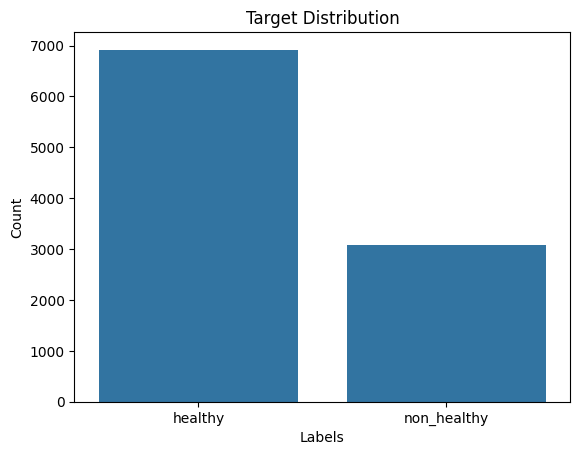

In [9]:
sns.countplot(x="label", data = dataset)
plt.title("Target Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

In [10]:
cor = dataset.iloc[:,:-1].corr()
cor

,rotation_freq_Hz,sampling_rate,duration_s,load,temperature_C,sound,rpm
rotation_freq_Hz,1.000000,0.005756,0.008701,-0.027430,0.300093,0.255911,0.717163
sampling_rate,0.005756,1.000000,0.005173,-0.002714,0.002037,0.009158,-0.001051
duration_s,0.008701,0.005173,1.000000,0.015689,0.008452,0.007506,-0.000318
load,-0.027430,-0.002714,0.015689,1.000000,-0.010365,-0.016014,-0.013598
temperature_C,0.300093,0.002037,0.008452,-0.010365,1.000000,0.534281,-0.033913
sound,0.255911,0.009158,0.007506,-0.016014,0.534281,1.000000,-0.017945
rpm,0.717163,-0.001051,-0.000318,-0.013598,-0.033913,-0.017945,1.000000


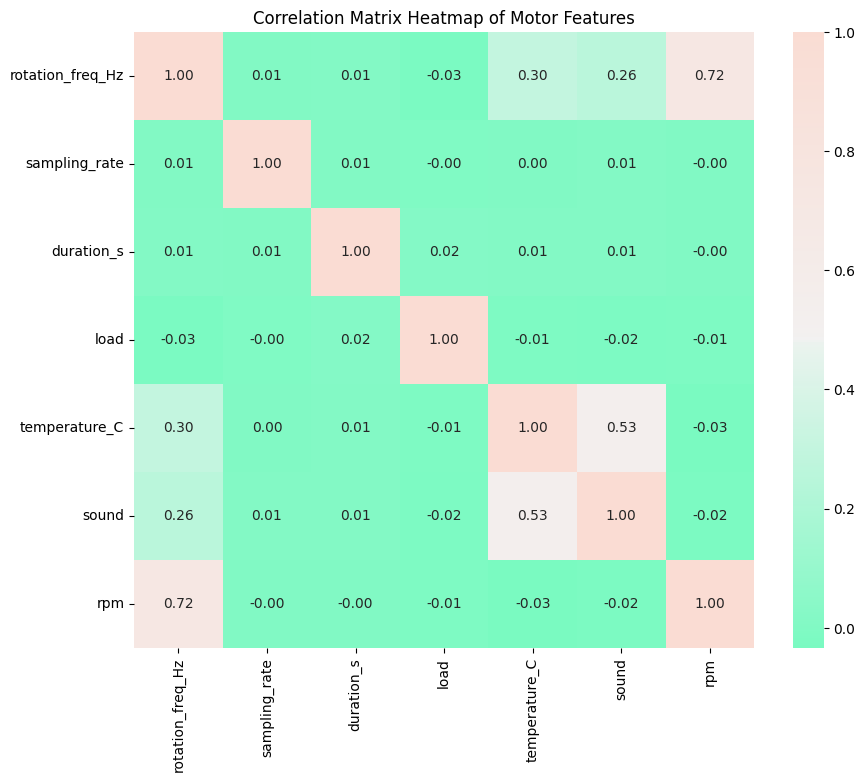

In [11]:
custom_cmap = sns.diverging_palette(h_neg=150, h_pos=30, s=80, l=90, as_cmap=True)
plt.figure(figsize=(10,8))
sns.heatmap(cor, cmap=custom_cmap, annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap of Motor Features')
plt.show()

In [12]:
#Importing the data
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [13]:
#Converting labels to numerical form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_le = le.fit_transform(y)
print("classes:", le.classes_)

classes: ['healthy' 'non_healthy']


In [14]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_le,test_size=0.2, random_state=42)

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [16]:
#Training the model (Losgistic Regression):
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train_s,y_train)
y_pred_lr = lor.predict(X_test_s)

Accuracy:  0.7695
Classification report:
               precision    recall  f1-score   support

     healthy       0.77      0.95      0.85      1393
 non_healthy       0.76      0.35      0.48       607

    accuracy                           0.77      2000
   macro avg       0.77      0.65      0.67      2000
weighted avg       0.77      0.77      0.74      2000



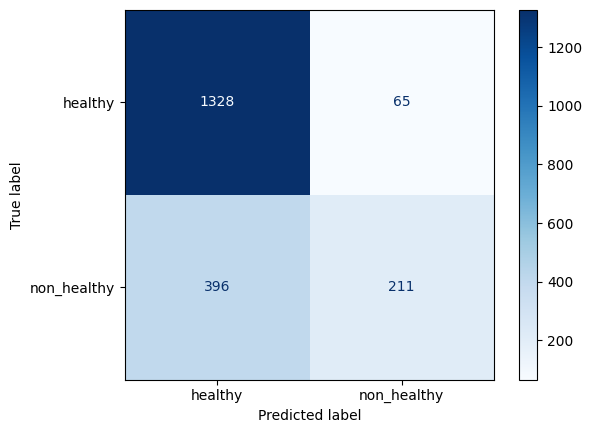

In [18]:
#Evaluating the Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
acc_lor = accuracy_score(y_test, y_pred_lr)
print("Accuracy: ", round(acc_lor,4))

report = classification_report(y_test, y_pred_lr, target_names=le.classes_, output_dict=True)
print("Classification report:\n" , classification_report(y_test, y_pred_lr, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
# Plot the matrix
disp.plot(cmap=plt.cm.Blues) # Using a blue colormap
plt.show()

In [19]:
#Training the model (K Nearest Neighbours):
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_s,y_train)
y_pred_knn = knn.predict(X_test_s)

Accuracy:  0.7395
Classification report:
               precision    recall  f1-score   support

     healthy       0.77      0.90      0.83      1393
 non_healthy       0.61      0.38      0.47       607

    accuracy                           0.74      2000
   macro avg       0.69      0.64      0.65      2000
weighted avg       0.72      0.74      0.72      2000



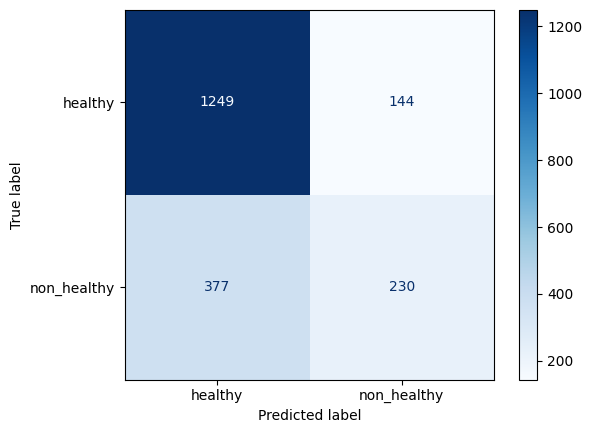

In [20]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy: ", round(acc_knn,4))

report = classification_report(y_test, y_pred_knn, target_names=le.classes_, output_dict=True)
print("Classification report:\n" , classification_report(y_test, y_pred_knn, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
# Plot the matrix
disp.plot(cmap=plt.cm.Blues) # Using a blue colormap
plt.show()

In [33]:
#Evalauting the model (Decision Tree)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight = 'balanced', random_state=0)
dtc.fit(X_train_s,y_train)
y_pred_dt = dtc.predict(X_test_s)

Accuracy:  0.702
Classification report:
               precision    recall  f1-score   support

     healthy       0.78      0.79      0.79      1393
 non_healthy       0.51      0.50      0.50       607

    accuracy                           0.70      2000
   macro avg       0.65      0.64      0.65      2000
weighted avg       0.70      0.70      0.70      2000



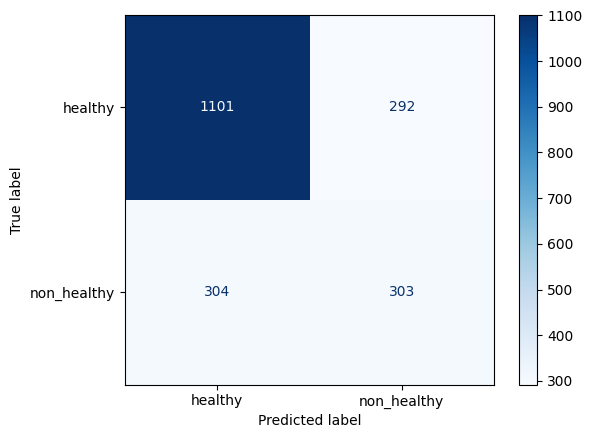

In [34]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy: ", round(acc_dt,4))

report = classification_report(y_test, y_pred_dt, target_names=le.classes_, output_dict=True)
print("Classification report:\n" , classification_report(y_test, y_pred_dt, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
# Plot the matrix
disp.plot(cmap=plt.cm.Blues) # Using a blue colormap
plt.show()

In [35]:
#Evalauting the model (Random Forest)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 30, max_depth = 12,class_weight = 'balanced', random_state = 0)
rfc.fit(X_train_s,y_train)
y_pred_rf = rfc.predict(X_test_s)

Accuracy:  0.7765
Classification report:
               precision    recall  f1-score   support

     healthy       0.82      0.87      0.84      1393
 non_healthy       0.65      0.57      0.61       607

    accuracy                           0.78      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.77      0.78      0.77      2000



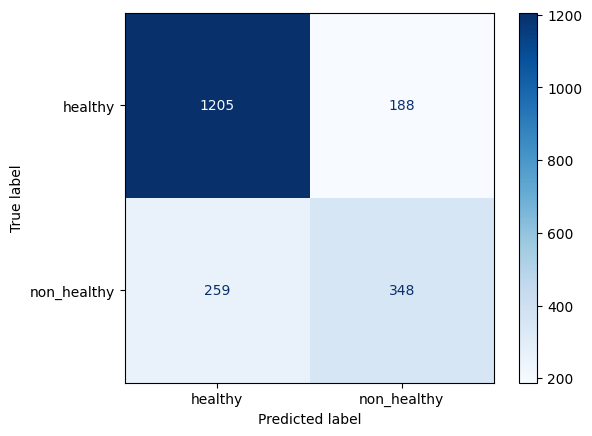

In [36]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy: ", round(acc_rf,4))

report = classification_report(y_test, y_pred_rf, target_names=le.classes_, output_dict=True)
print("Classification report:\n" , classification_report(y_test, y_pred_rf, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
# Plot the matrix
disp.plot(cmap=plt.cm.Blues) # Using a blue colormap
plt.show()

In [37]:
#Evalauting the model (Support vector Machine)
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', C =1.0, probability = False)
svc.fit(X_train_s,y_train)
y_pred_svc = svc.predict(X_test_s)

Accuracy:  0.791
Classification report:
               precision    recall  f1-score   support

     healthy       0.80      0.93      0.86      1393
 non_healthy       0.75      0.46      0.57       607

    accuracy                           0.79      2000
   macro avg       0.78      0.70      0.72      2000
weighted avg       0.79      0.79      0.77      2000



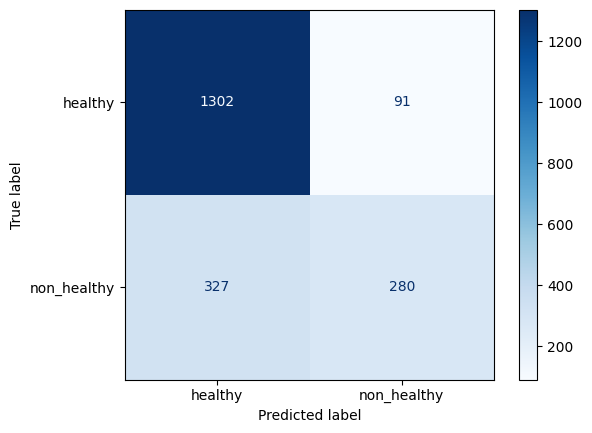

In [38]:
acc_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy: ", round(acc_svc,4))

report = classification_report(y_test, y_pred_svc, target_names=le.classes_, output_dict=True)
print("Classification report:\n" , classification_report(y_test, y_pred_svc, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
# Plot the matrix
disp.plot(cmap=plt.cm.Blues) # Using a blue colormap
plt.show()

In [39]:
# Acuracies of all models
print("Logistic Regression model's accuracy: ", acc_lor)
print("K Nearest Neighbour model's accuracy: ", acc_knn)
print("Decision Tree Classification model's accuracy: ", acc_dt)
print("Random Forest Classifiction model's accuracy: ", acc_rf)
print("Support Vector Classification model's accuracy: ", acc_svc)

Logistic Regression model's accuracy:  0.7695
K Nearest Neighbour model's accuracy:  0.7395
Decision Tree Classification model's accuracy:  0.702
Random Forest Classifiction model's accuracy:  0.7765
Support Vector Classification model's accuracy:  0.791


In [42]:
# Applying K-fold Cross Validtion
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Logistic Regression
lr_model_score = cross_val_score(lor, X, y_le, cv =kf)
#K Nearest Neighbour
knn_model_score = cross_val_score(knn, X, y_le, cv =kf)
#Decision Tree
dtc_model_score = cross_val_score(dtc, X, y_le, cv =kf)
#Random Forest
rfc_model_score = cross_val_score(rfc, X, y_le, cv =kf)
#Support Vector Machine
svc_model_score = cross_val_score(svc, X, y_le, cv =kf)
# Final Accuracies
print("Logistic Regression model's accuracy: ", np.mean(lr_model_score))
print("K Nearest Neighbour model's accuracy: ", np.mean(knn_model_score))
print("Decision Tree Classification model's accuracy: ", np.mean(dtc_model_score))
print("Random Forest Classifiction model's accuracy: ", np.mean(rfc_model_score))
print("Support Vector Classification model's accuracy: ", np.mean(svc_model_score))

Logistic Regression model's accuracy:  0.7669
K Nearest Neighbour model's accuracy:  0.7412000000000001
Decision Tree Classification model's accuracy:  0.6941999999999999
Random Forest Classifiction model's accuracy:  0.7652
Support Vector Classification model's accuracy:  0.6920999999999999
